Epoch 1/25
6999/6999 - 28s - loss: 0.0064
Epoch 2/25
6999/6999 - 10s - loss: 0.0039
Epoch 3/25
6999/6999 - 10s - loss: 0.0035
Epoch 4/25
6999/6999 - 10s - loss: 0.0035
Epoch 5/25
6999/6999 - 11s - loss: 0.0035
Epoch 6/25
6999/6999 - 10s - loss: 0.0034
Epoch 7/25
6999/6999 - 10s - loss: 0.0034
Epoch 8/25
6999/6999 - 10s - loss: 0.0034
Epoch 9/25
6999/6999 - 10s - loss: 0.0034
Epoch 10/25
6999/6999 - 10s - loss: 0.0034
Epoch 11/25
6999/6999 - 9s - loss: 0.0034
Epoch 12/25
6999/6999 - 9s - loss: 0.0034
Epoch 13/25
6999/6999 - 9s - loss: 0.0034
Epoch 14/25
6999/6999 - 10s - loss: 0.0034
Epoch 15/25
6999/6999 - 10s - loss: 0.0034
Epoch 16/25
6999/6999 - 10s - loss: 0.0034
Epoch 17/25
6999/6999 - 10s - loss: 0.0034
Epoch 18/25
6999/6999 - 11s - loss: 0.0034
Epoch 19/25
6999/6999 - 11s - loss: 0.0034
Epoch 20/25
6999/6999 - 11s - loss: 0.0034
Epoch 21/25
6999/6999 - 10s - loss: 0.0034
Epoch 22/25
6999/6999 - 9s - loss: 0.0034
Epoch 23/25
6999/6999 - 9s - loss: 0.0034
Epoch 24/25
6999/6999 - 1

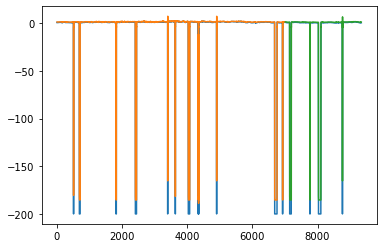

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset 
dataframe = pd.read_csv('epoch10_Air.csv', usecols=[1])
dataframe = dataframe.iloc[::-1]
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back =5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Epoch 1/25
6992/6992 - 14s - loss: 0.0430
Epoch 2/25
6992/6992 - 12s - loss: 0.0047
Epoch 3/25
6992/6992 - 11s - loss: 0.0039
Epoch 4/25
6992/6992 - 11s - loss: 0.0036
Epoch 5/25
6992/6992 - 11s - loss: 0.0035
Epoch 6/25
6992/6992 - 11s - loss: 0.0035
Epoch 7/25
6992/6992 - 10s - loss: 0.0034
Epoch 8/25
6992/6992 - 10s - loss: 0.0035
Epoch 9/25
6992/6992 - 10s - loss: 0.0034
Epoch 10/25
6992/6992 - 10s - loss: 0.0035
Epoch 11/25
6992/6992 - 11s - loss: 0.0035
Epoch 12/25
6992/6992 - 12s - loss: 0.0034
Epoch 13/25
6992/6992 - 11s - loss: 0.0034
Epoch 14/25
6992/6992 - 11s - loss: 0.0034
Epoch 15/25
6992/6992 - 11s - loss: 0.0034
Epoch 16/25
6992/6992 - 11s - loss: 0.0034
Epoch 17/25
6992/6992 - 11s - loss: 0.0034
Epoch 18/25
6992/6992 - 11s - loss: 0.0034
Epoch 19/25
6992/6992 - 12s - loss: 0.0035
Epoch 20/25
6992/6992 - 12s - loss: 0.0034
Epoch 21/25
6992/6992 - 11s - loss: 0.0034
Epoch 22/25
6992/6992 - 11s - loss: 0.0034
Epoch 23/25
6992/6992 - 11s - loss: 0.0034
Epoch 24/25
6992/699

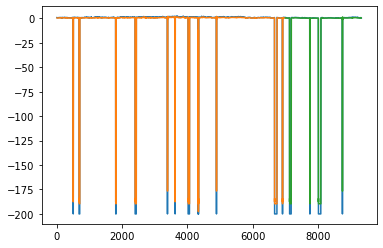

In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset 
dataframe = pd.read_csv('epoch20_Air.csv', usecols=[1])
dataframe = dataframe.iloc[::-1]
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back =5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Epoch 1/25
6954/6954 - 13s - loss: 0.0087
Epoch 2/25
6954/6954 - 11s - loss: 0.0037
Epoch 3/25
6954/6954 - 11s - loss: 0.0035
Epoch 4/25
6954/6954 - 11s - loss: 0.0034
Epoch 5/25
6954/6954 - 11s - loss: 0.0034
Epoch 6/25
6954/6954 - 10s - loss: 0.0034
Epoch 7/25
6954/6954 - 11s - loss: 0.0035
Epoch 8/25
6954/6954 - 12s - loss: 0.0035
Epoch 9/25
6954/6954 - 12s - loss: 0.0034
Epoch 10/25
6954/6954 - 11s - loss: 0.0034
Epoch 11/25
6954/6954 - 12s - loss: 0.0035
Epoch 12/25
6954/6954 - 12s - loss: 0.0034
Epoch 13/25
6954/6954 - 12s - loss: 0.0034
Epoch 14/25
6954/6954 - 10s - loss: 0.0034
Epoch 15/25
6954/6954 - 11s - loss: 0.0034
Epoch 16/25
6954/6954 - 11s - loss: 0.0034
Epoch 17/25
6954/6954 - 10s - loss: 0.0034
Epoch 18/25
6954/6954 - 12s - loss: 0.0034
Epoch 19/25
6954/6954 - 11s - loss: 0.0034
Epoch 20/25
6954/6954 - 12s - loss: 0.0034
Epoch 21/25
6954/6954 - 11s - loss: 0.0034
Epoch 22/25
6954/6954 - 12s - loss: 0.0034
Epoch 23/25
6954/6954 - 11s - loss: 0.0034
Epoch 24/25
6954/695

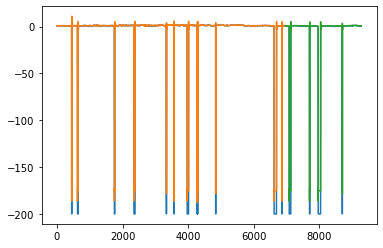

In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset 
dataframe = pd.read_csv('epoch70_Air.csv', usecols=[1])
dataframe = dataframe.iloc[::-1]
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back =5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
